# Import Libraries

It is important to define and import our Python libraries so that we can pull functions from them.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Defining Functions

We define our own functions that we have written and will be utilizing throughout the code.

In [43]:
#Runge-Kutta Method
def rk4(u_k, delta_t):
    k1 = delta_t*f_true(u_k)
    k2 = delta_t*f_true(u_k+k1/2)
    k3 = delta_t*f_true(u_k+k2/2)
    k4 = delta_t*f_true(u_k+k3)

    ukplus1 = u_k + (k1 + 2*k2 + 2*k3 + k4)/6
    return ukplus1

#
def ivp_rk4(u_0, T, delta_t):
    times = []
    u = []
    num_elements = int(T / delta_t) + 1
    sol_r = []
    sol_time = 0
    threshold = np.radians(10)
    first = False
    for t_k in np.linspace(0,T,num_elements):
        r = u_0[0]
        dist = []
        N = r.shape[0]
        if first != True:
            for i in range(1,N):
                dist.append(r[i]-r[0])
            for i in range(1, N-1):
                cross = np.cross(dist[i],dist[i-1])/(np.linalg.norm(dist[i])*np.linalg.norm(dist[i-1]))
                theta = np.arcsin(np.linalg.norm(cross))
                if theta > threshold or theta < -threshold:
                    break
                elif i == N-2:
                    sol_r = r[2]
                    sol_time = t_k
                    first = True
        times.append(t_k)
        u.append(u_0)
        u_k = rk4(u_0, delta_t)
        u_0 = u_k
    return np.array(u), times, sol_r, sol_time

def f_true(u):
    r = u[0]
    v = u[1]
    N = r.shape[0]
    rddot = np.zeros((N,3))
    for i in range(0,N):
        for j in range(0,N):
            if i == j:
                continue
            rddot[i] += G*m[j]*(r[j]-r[i])/(np.linalg.norm(r[j]-r[i])**3)
    udot = np.zeros(u.shape)
    udot[0] = v
    udot[1] = rddot
    return udot

def ab4(u_0,T,delta_t):
    k = int(T/delta_t) + 1
    times = np.linspace(0, T, k)
    u = []
    u.append(u_0)
    u.append(rk4(u[0],delta_t))
    u.append(rk4(u[1],delta_t))
    u.append(rk4(u[2],delta_t))
    for i in range (4,k):
        u.append(u[i-1] + (delta_t/24) * (55*f_true(u[i-1]) - 59*f_true(u[i-2]) + 37*f_true(u[i-3]) - 9*f_true(u[i-4])))
    return np.array(u),times

# Variables

After we have defined our functions, we need to set establish our variables and their set values, along with some intiial conditions for our system.

In [44]:
#Gravitational Constant
G = 6.674e-11


#Final Time and Time Steps
T, dt = 24*60*60*365*1, 60*60


#Masses and Orbital Radii of our Bodies
mSaturn = 568.32e24 # kg
mTitan = 1.345e23 # kg
rTitan = 1.22e9 # m
mDeathStar = 2.24e23 # m
mHyperion = 5.58*1080 # kg
rHyperion = 1.5e9 # m
mIapetus = 1.806*1021 # kg
rIapetus = 3.56e9 #m
mFenrir = 1e13 # kg
rFenrir = 22.5e9 # m
m = np.array([mSaturn,mTitan,mDeathStar, mHyperion, mIapetus, mFenrir]) # , mFenrir

r0 = np.zeros((np.size(m),3))
r0[0] = [0.0, 0.0, 0.0]
r0[1] = [rTitan, 0.0,0.0]
r0[3] = [rHyperion, 0.0, 0.0]
r0[4] = [rIapetus, 0.0, 0.0]
r0[5] = [rFenrir, 0.0, 0.0]
rDeathStar = np.max(r0)*2
r0[2] = [rDeathStar*np.sin(np.pi/4), rDeathStar*np.cos(np.pi/4), 0.0]


#Determining the Velocities of our Bodies
v0 = np.zeros((np.size(m),3))
v0[0] = [0.0, 0.0, 0.0]
v0[1] = [0.0, -np.sqrt(G*m[0]/np.linalg.norm(r0[1])), 0.0]
vDeathStar = np.sqrt(G*m[0]/np.linalg.norm(r0[2]))
v0[2] = [vDeathStar*np.cos(np.pi/4), -vDeathStar*np.sin(np.pi/4), 0.0]
v0[3] = [0.0, -np.sqrt(G*m[0]/np.linalg.norm(r0[3])), 0.0]
v0[4] = [0.0, -np.sqrt(G*m[0]/np.linalg.norm(r0[4])), 0.0]
v0[5] = [0.0, -np.sqrt(G*m[0]/np.linalg.norm(r0[5])), 0.0]


[]
0
[]


# Finding our Positions

We utilize our numerical methods to iterate through our system and find the positions of our bodies, along with the point in which all of the bodies align collinearly.

In [ ]:
#Initial Positions and Velocities
u0 = np.array([r0, v0])


#Producing the Positions, Velocities and Times of the System using RK4
u_rk, times, sol_r, sol_time = ivp_rk4(u0, T, dt)


#Splitting into Positions and Velocities
ur = u_rk[:,0]
uv = u_rk[:,1]

#Assign the Positions to their Respective Bodies
r1 = []
r2 = []
r3 = []
r4 = []
r5 = []
r6 = []

for i in range(ur.shape[0]):
    r1.append(ur[i][0])
    r2.append(ur[i][1])
    r3.append(ur[i][2])
    r4.append(ur[i][3])
    r5.append(ur[i][4])
    r6.append(ur[i][5])
r1 = np.array(r1)
r2 = np.array(r2)
r3 = np.array(r3)
r4 = np.array(r4)
r5 = np.array(r5)
r6 = np.array(r6)


#Print Solutions of our System
print(sol_r)
print(sol_time)
sol_r = np.array(sol_r)
sol = np.vstack((sol_r, np.zeros(sol_r.shape)))
print(sol)


# Simulation

We simulate our data through plotting the trajectory of our bodies and the our true solution.

IndexError: index 0 is out of bounds for axis 1 with size 0

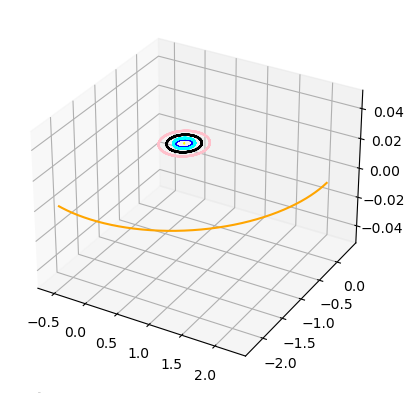

In [45]:
#Initializing our Graph
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


#Plotting the Positions of our Bodies
ax.plot(r1[:,0], r1[:,1], r1[:,2], color="yellow", label="Saturn")
ax.plot(r2[:,0], r2[:,1], r2[:,2], color="blue", label="Titan")
ax.plot(r3[:,0], r3[:,1], r3[:,2], color="black", label="Death Star")
ax.plot(r4[:,0], r4[:,1], r4[:,2], color="cyan", label="Hyperion")
ax.plot(r5[:,0], r5[:,1], r5[:,2], color="pink", label="Iapetus")
ax.plot(r6[:,0], r6[:,1], r6[:,2], color="orange", label="Fenrir")

#Plotting a Solution
ax.plot(sol[:,0], sol[:,1], sol[:,2], color="r", label="Solution")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.suptitle("N Body Dynamics")
plt.legend()
plt.show()